In [1]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

/home/jn107154/miniconda3/envs/tfgpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [3]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['categorical_accuracy'])+1),model_history.history['categorical_accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_categorical_accuracy'])+1),model_history.history['val_categorical_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['categorical_accuracy'])+1),len(model_history.history['categorical_accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


In [4]:
np.random.seed(2017)

#import cifar10
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

print("dimensions", train_features.shape)

dimensions (50000, 3, 32, 32)


In [5]:
# scale the features
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [6]:
# optimizer
Adadelta = keras.optimizers.Adadelta()


In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(64, (4, 4), padding='same', input_shape=(3, 32, 32)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Convolution2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 32, 32)        3136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 64, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 16, 16)        16448     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 16, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
__________

In [9]:
from keras.metrics import categorical_accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adadelta, metrics=[categorical_accuracy])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
# Train the model
start = datetime.now()
model_info = model.fit(train_features, train_labels, 
                       batch_size=32, epochs=100, 
                       validation_data = (test_features, test_labels), 
                       verbose=1)
end = datetime.now()

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 19s 375us/step - loss: 1.8274 - categorical_accuracy: 0.3269 - val_loss: 1.4996 - val_categorical_accuracy: 0.4498
Epoch 2/100
50000/50000 [==============================] - 17s 350us/step - loss: 1.5060 - categorical_accuracy: 0.4532 - val_loss: 1.3400 - val_categorical_accuracy: 0.5123
Epoch 3/100
50000/50000 [==============================] - 17s 344us/step - loss: 1.3762 - categorical_accuracy: 0.5004 - val_loss: 1.2173 - val_categorical_accuracy: 0.5602
Epoch 4/100
50000/50000 [==============================] - 17s 345us/step - loss: 1.2846 - categorical_accuracy: 0.5411 - val_loss: 1.2020 - val_categorical_accuracy: 0.5704
Epoch 5/100
50000/50000 [==============================] - 17s 344us/step - loss: 1.2133 - categorical_accuracy: 0.5690 - val_loss: 1.0779 - val_categorical_accuracy: 0.6163
Epoch 6/100
50000/50000 [==============================] - 17s 344us/step - loss

50000/50000 [==============================] - 17s 346us/step - loss: 0.6593 - categorical_accuracy: 0.7754 - val_loss: 0.6894 - val_categorical_accuracy: 0.7652
Epoch 48/100
50000/50000 [==============================] - 17s 346us/step - loss: 0.6523 - categorical_accuracy: 0.7787 - val_loss: 0.7307 - val_categorical_accuracy: 0.7532
Epoch 49/100
50000/50000 [==============================] - 17s 348us/step - loss: 0.6472 - categorical_accuracy: 0.7807 - val_loss: 0.6695 - val_categorical_accuracy: 0.7725
Epoch 50/100
50000/50000 [==============================] - 17s 338us/step - loss: 0.6486 - categorical_accuracy: 0.7797 - val_loss: 0.7303 - val_categorical_accuracy: 0.7522
Epoch 51/100
50000/50000 [==============================] - 17s 350us/step - loss: 0.6467 - categorical_accuracy: 0.7819 - val_loss: 0.6770 - val_categorical_accuracy: 0.7678
Epoch 52/100
50000/50000 [==============================] - 17s 347us/step - loss: 0.6426 - categorical_accuracy: 0.7808 - val_loss: 0.660

Epoch 94/100
50000/50000 [==============================] - 17s 344us/step - loss: 0.5877 - categorical_accuracy: 0.8038 - val_loss: 0.6458 - val_categorical_accuracy: 0.7873
Epoch 95/100
50000/50000 [==============================] - 17s 346us/step - loss: 0.5854 - categorical_accuracy: 0.8035 - val_loss: 0.6446 - val_categorical_accuracy: 0.7884
Epoch 96/100
50000/50000 [==============================] - 17s 345us/step - loss: 0.5845 - categorical_accuracy: 0.8041 - val_loss: 0.6858 - val_categorical_accuracy: 0.7665
Epoch 97/100
50000/50000 [==============================] - 17s 346us/step - loss: 0.5771 - categorical_accuracy: 0.8067 - val_loss: 0.6540 - val_categorical_accuracy: 0.7820
Epoch 98/100
50000/50000 [==============================] - 17s 347us/step - loss: 0.5814 - categorical_accuracy: 0.8071 - val_loss: 0.7564 - val_categorical_accuracy: 0.7542
Epoch 99/100
50000/50000 [==============================] - 17s 343us/step - loss: 0.5799 - categorical_accuracy: 0.8054 - va

In [11]:
print("Model took %0.2f seconds to train", (end - start))

Model took %0.2f seconds to train 0:28:40.034875


In [12]:
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Accuracy on test data is: 78.36


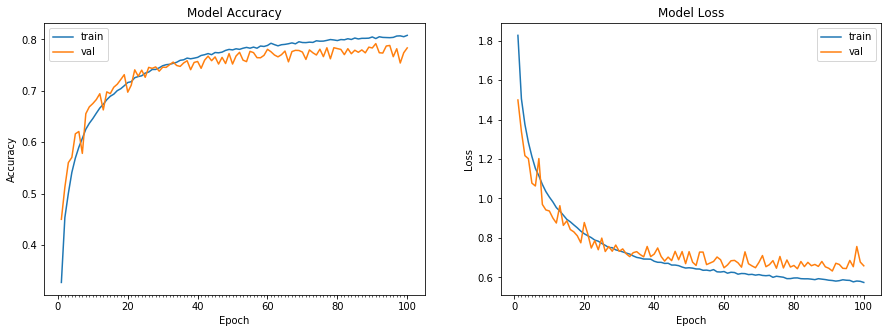

In [13]:
# plot model history
plot_model_history(model_info)